# 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드

In [3]:
train = pd.read_csv("data/train.csv", index_col=0)
print(train.shape)
train.head(2)

(26457, 19)


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


In [4]:
test = pd.read_csv("data/test.csv", index_col=0)
print(test.shape)
test.head(2)

(10000, 18)


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0


In [5]:
# 컬럼 비교
set(train.columns) - set(test.columns)

{'credit'}

## info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  object 
 6   edu_type       10000 non-null  object 
 7   family_type    10000 non-null  object 
 8   house_type     10000 non-null  object 
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  int64  
 12  work_phone     10000 non-null  int64  
 13  phone          10000 non-null  int64  
 14  email          10000 non-null  int64  
 15  occyp_type     6848 non-null   object 
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
dtypes:

# downcast

In [8]:
def downcast(df):
    for i in df.columns:
        if df[i].dtypes == "int64":
            df[i] = pd.to_numeric(df[i], downcast="unsigned")
        elif df[i].dtypes == "float64":
            df[i] = pd.to_numeric(df[i], downcast="float")
        elif df[i].dtypes == "object":
            df[i] = df[i].astype("category")

In [9]:
downcast(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         26457 non-null  category
 1   car            26457 non-null  category
 2   reality        26457 non-null  category
 3   child_num      26457 non-null  uint8   
 4   income_total   26457 non-null  float32 
 5   income_type    26457 non-null  category
 6   edu_type       26457 non-null  category
 7   family_type    26457 non-null  category
 8   house_type     26457 non-null  category
 9   DAYS_BIRTH     26457 non-null  int64   
 10  DAYS_EMPLOYED  26457 non-null  int64   
 11  FLAG_MOBIL     26457 non-null  uint8   
 12  work_phone     26457 non-null  uint8   
 13  phone          26457 non-null  uint8   
 14  email          26457 non-null  uint8   
 15  occyp_type     18286 non-null  category
 16  family_size    26457 non-null  float32 
 17  begin_month    26457 non-null  

In [10]:
downcast(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         10000 non-null  category
 1   car            10000 non-null  category
 2   reality        10000 non-null  category
 3   child_num      10000 non-null  uint8   
 4   income_total   10000 non-null  float32 
 5   income_type    10000 non-null  category
 6   edu_type       10000 non-null  category
 7   family_type    10000 non-null  category
 8   house_type     10000 non-null  category
 9   DAYS_BIRTH     10000 non-null  int64   
 10  DAYS_EMPLOYED  10000 non-null  int64   
 11  FLAG_MOBIL     10000 non-null  uint8   
 12  work_phone     10000 non-null  uint8   
 13  phone          10000 non-null  uint8   
 14  email          10000 non-null  uint8   
 15  occyp_type     6848 non-null   category
 16  family_size    10000 non-null  float32 
 17  begin_month    10000 non-nu

## histogram

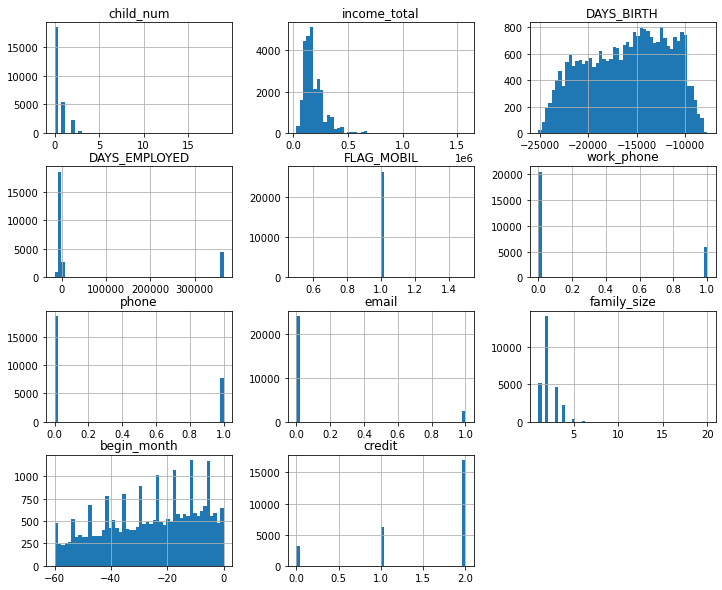

In [11]:
train.hist(figsize=(12, 10), bins=50);

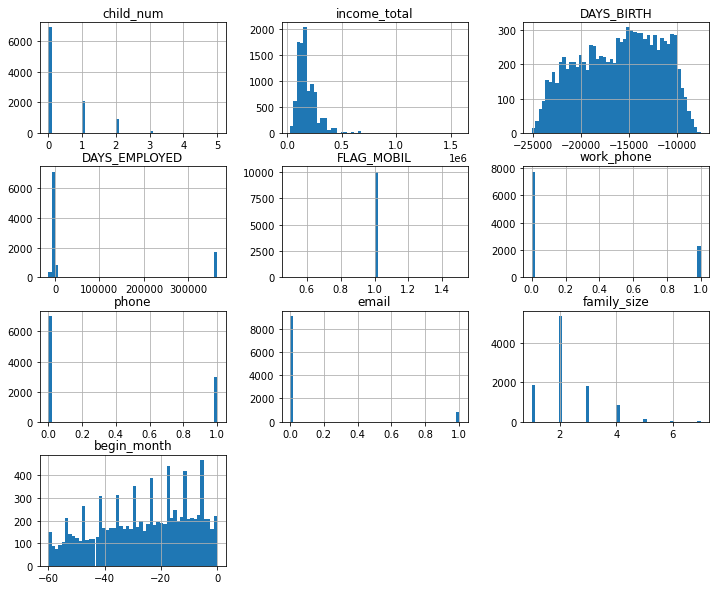

In [12]:
test.hist(figsize=(12, 10), bins=50);

## 결측치

In [13]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [14]:
test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

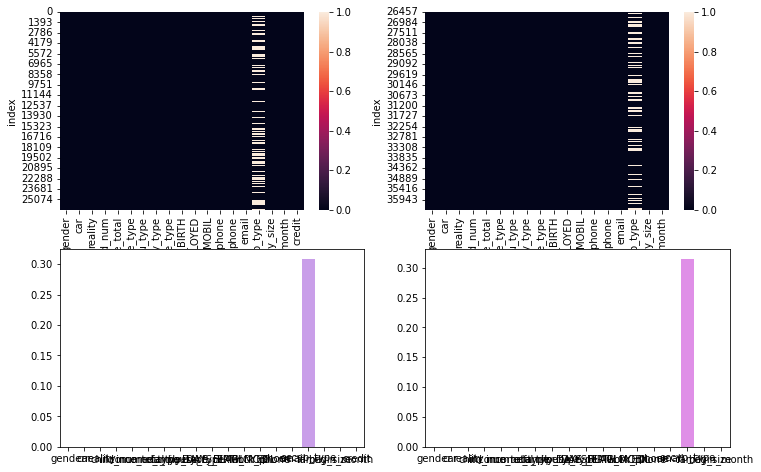

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.heatmap(train.isnull(), ax=axes[0, 0]);
sns.heatmap(test.isnull(), ax=axes[0, 1]);
sns.barplot(data=train.isnull(), ci=None, ax=axes[1, 0]);
sns.barplot(data=test.isnull(), ci=None, ax=axes[1, 1]);

## 결측치 제거

In [16]:
train = train.drop(columns="occyp_type")
test = test.drop(columns="occyp_type")

---

# outlier

#### child_num > 5 이상인 값 제거

In [17]:
# train : child_num 빈도수
train.child_num.value_counts().sort_index()

0     18340
1      5386
2      2362
3       306
4        47
5        10
7         2
14        3
19        1
Name: child_num, dtype: int64

In [18]:
# test : child_num 빈도수
test.child_num.value_counts().sort_index()

0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64

In [19]:
# 5 이상인 값이 train에만 있음
train = train[train["child_num"] <= 5]

# Feature Engineering

#### DAYS_EMPLOYED가 양수인 경우, 무직자로 판단 => 구분하기 쉽게 0으로 변환

In [20]:
train.DAYS_EMPLOYED.value_counts().sort_index()

-15713        1
-15661        2
-15072        3
-15038       14
-14887        5
           ... 
-70           4
-65           1
-43           1
-17           2
 365243    4438
Name: DAYS_EMPLOYED, Length: 3469, dtype: int64

In [21]:
test.DAYS_EMPLOYED.value_counts().sort_index()

-15661        2
-15227        1
-15038        2
-14887        1
-14810        2
           ... 
-73           2
-66           1
-65           1
-17           1
 365243    1697
Name: DAYS_EMPLOYED, Length: 2665, dtype: int64

In [22]:
train.loc[train["DAYS_EMPLOYED"] >= 0, "DAYS_EMPLOYED"] = 0
test.loc[test["DAYS_EMPLOYED"] >= 0, "DAYS_EMPLOYED"] = 0

#### DAYS_BIRTH, DAYS_EMPLOYED, begin_month 양수 변환

In [23]:
train["DAYS_BIRTH"] = abs(train["DAYS_BIRTH"])
test["DAYS_BIRTH"] = abs(test["DAYS_BIRTH"])

train["DAYS_EMPLOYED"] = abs(train["DAYS_EMPLOYED"])
test["DAYS_EMPLOYED"] = abs(test["DAYS_EMPLOYED"])

train["begin_month"] = abs(train["begin_month"])
test["begin_month"] = abs(test["begin_month"])

#### FLAG_MOBIL 값이 모두 1이므로 제거

In [24]:
train.FLAG_MOBIL.value_counts()

1    26451
Name: FLAG_MOBIL, dtype: int64

In [25]:
test.FLAG_MOBIL.value_counts()

1    10000
Name: FLAG_MOBIL, dtype: int64

In [26]:
train = train.drop(columns="FLAG_MOBIL")
test = test.drop(columns="FLAG_MOBIL")

## 파생변수

#### DAYS_BIRTH 출생일로 나이 컬럼 만들기

In [27]:
train["age"] = train["DAYS_BIRTH"] // 365
test["age"] = test["DAYS_BIRTH"] // 365

#### DAYS_EMPLOYED 업무 시작일로 근속연수 컬럼 만들기

In [28]:
train["employed"] = train["DAYS_EMPLOYED"] // 365
test["employed"] = test["DAYS_EMPLOYED"] // 365

#### 다중공선을 보이는 컬럼 삭제
- 다중공선성 (multicollinearity) : 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우
    - DAYS_BIRTH => age
    - DAYS_EMPLOYED => employed
    - 기존 컬럼 삭제 !

In [29]:
train = train.drop(columns=["DAYS_BIRTH", "DAYS_EMPLOYED"])
test = test.drop(columns=["DAYS_BIRTH", "DAYS_EMPLOYED"])

# Encoding

#### Binary Encoding
- gender, car, reality

In [30]:
train.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,family_size,begin_month,credit,age,employed
index,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,0,0,0,2.0,6.0,1.0,38,12
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,1,3.0,5.0,1.0,31,4


In [31]:
train["gender"] = train["gender"].replace(["M", "F"], [0, 1])
test["gender"] = test["gender"].replace(["M", "F"], [0, 1])

train["car"] = train["car"].replace(["N", "Y"], [0, 1])
test["car"] = test["car"].replace(["N", "Y"], [0, 1])

train["reality"] = train["reality"].replace(["N", "Y"], [0, 1])
test["reality"] = test["reality"].replace(["N", "Y"], [0, 1])

In [32]:
train.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,family_size,begin_month,credit,age,employed
index,,,,,,,,,,,,,,,,,
0,1,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,0,0,0,2.0,6.0,1.0,38,12
1,1,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,1,3.0,5.0,1.0,31,4


---

#### Ordinal Encoding
- income_type, edu_type, family_type, house_type

In [33]:
train.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,family_size,begin_month,credit,age,employed
index,,,,,,,,,,,,,,,,,
0,1,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,0,0,0,2.0,6.0,1.0,38,12
1,1,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,1,3.0,5.0,1.0,31,4


In [34]:
from category_encoders import OrdinalEncoder

cat_features = ["income_type", "edu_type", "family_type", "house_type"]

encoder = OrdinalEncoder(cat_features)

train[cat_features] = encoder.fit_transform(train[cat_features])
test[cat_features] = encoder.fit_transform(test[cat_features])

In [35]:
train.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,family_size,begin_month,credit,age,employed
index,,,,,,,,,,,,,,,,,
0,1,0,0,0,202500.0,1,1,1,1,0,0,0,2.0,6.0,1.0,38,12
1,1,0,1,1,247500.0,1,2,2,2,0,0,1,3.0,5.0,1.0,31,4


# Scaling

- income_total

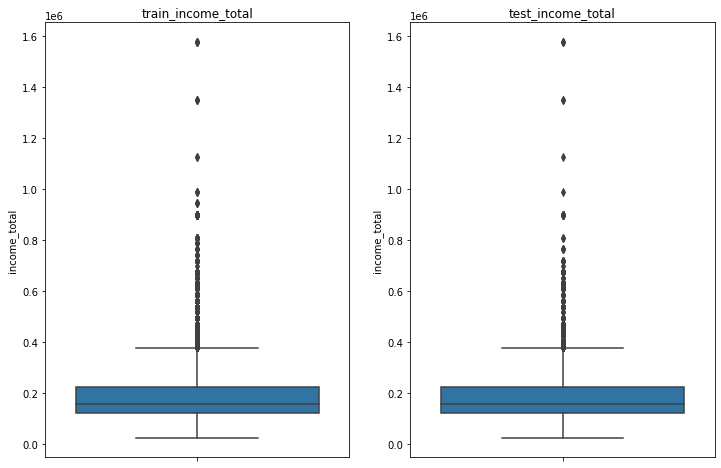

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes[0].set_title("train_income_total")
axes[1].set_title("test_income_total")
sns.boxplot(data=train, y="income_total", ax=axes[0]);
sns.boxplot(data=test, y="income_total", ax=axes[1]);

- 튀는 값들로 인해 표준화를 진행하려 했으나, 음수값의 경우 CatBoost에서 작동하지 않음 => MinMaxScaler

In [37]:
train.income_total.head()

index
0    202500.0
1    247500.0
2    450000.0
3    202500.0
4    157500.0
Name: income_total, dtype: float32

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train["income_total"] = scaler.fit_transform(train[["income_total"]])
test["income_total"] = scaler.fit_transform(test[["income_total"]])

In [39]:
train.income_total.head()

index
0    0.113372
1    0.142442
2    0.273256
3    0.113372
4    0.084302
Name: income_total, dtype: float32

# dtype 변경

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gender        26451 non-null  category
 1   car           26451 non-null  category
 2   reality       26451 non-null  category
 3   child_num     26451 non-null  uint8   
 4   income_total  26451 non-null  float32 
 5   income_type   26451 non-null  int32   
 6   edu_type      26451 non-null  int32   
 7   family_type   26451 non-null  int32   
 8   house_type    26451 non-null  int32   
 9   work_phone    26451 non-null  uint8   
 10  phone         26451 non-null  uint8   
 11  email         26451 non-null  uint8   
 12  family_size   26451 non-null  float32 
 13  begin_month   26451 non-null  float32 
 14  credit        26451 non-null  float32 
 15  age           26451 non-null  int64   
 16  employed      26451 non-null  int64   
dtypes: category(3), float32(4), int32(4), int64(2), ui

- gender, car, reality => binary encoding 으로 정수형 변환 가능
- family_size, begin_month, credit => 가족 규모, 신용카드 발급 월, 신용도이므로 정수형 변환 가능


- income_type은 정규화 처리 => float

In [41]:
col = ["gender", "car", "reality", "family_size", "begin_month", "credit"]

In [42]:
def downcast2(df):
    if "credit" in df.columns:
        for i in col:
            df[i] = pd.to_numeric(df[i], downcast="unsigned")
    else:
        for i in col[:-1]:
            df[i] = pd.to_numeric(df[i], downcast="unsigned")

In [43]:
downcast2(train)
downcast2(test)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        26451 non-null  uint8  
 1   car           26451 non-null  uint8  
 2   reality       26451 non-null  uint8  
 3   child_num     26451 non-null  uint8  
 4   income_total  26451 non-null  float32
 5   income_type   26451 non-null  int32  
 6   edu_type      26451 non-null  int32  
 7   family_type   26451 non-null  int32  
 8   house_type    26451 non-null  int32  
 9   work_phone    26451 non-null  uint8  
 10  phone         26451 non-null  uint8  
 11  email         26451 non-null  uint8  
 12  family_size   26451 non-null  uint8  
 13  begin_month   26451 non-null  uint8  
 14  credit        26451 non-null  uint8  
 15  age           26451 non-null  int64  
 16  employed      26451 non-null  int64  
dtypes: float32(1), int32(4), int64(2), uint8(10)
memory usage: 1.4 MB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        10000 non-null  uint8  
 1   car           10000 non-null  uint8  
 2   reality       10000 non-null  uint8  
 3   child_num     10000 non-null  uint8  
 4   income_total  10000 non-null  float32
 5   income_type   10000 non-null  int32  
 6   edu_type      10000 non-null  int32  
 7   family_type   10000 non-null  int32  
 8   house_type    10000 non-null  int32  
 9   work_phone    10000 non-null  uint8  
 10  phone         10000 non-null  uint8  
 11  email         10000 non-null  uint8  
 12  family_size   10000 non-null  uint8  
 13  begin_month   10000 non-null  uint8  
 14  age           10000 non-null  int64  
 15  employed      10000 non-null  int64  
dtypes: float32(1), int32(4), int64(2), uint8(9)
memory usage: 517.6 KB


# 데이터셋 만들기

In [46]:
# 사용할 컬럼
label_name = "credit"

feature_names = train.columns.to_list()
feature_names.remove(label_name)
label_name, feature_names

('credit',
 ['gender',
  'car',
  'reality',
  'child_num',
  'income_total',
  'income_type',
  'edu_type',
  'family_type',
  'house_type',
  'work_phone',
  'phone',
  'email',
  'family_size',
  'begin_month',
  'age',
  'employed'])

In [47]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

# CatBoost

In [48]:
from catboost import CatBoostClassifier

# iterations : 반복 횟수
clf = CatBoostClassifier(
    iterations=1000
)

In [49]:
# verbose : *회마다 출력
clf.fit(
    X_train, y_train,
    verbose=100
)

Learning rate set to 0.093512
0:	learn: 1.0460916	total: 152ms	remaining: 2m 31s
100:	learn: 0.7810109	total: 761ms	remaining: 6.77s
200:	learn: 0.7516982	total: 1.44s	remaining: 5.74s
300:	learn: 0.7293084	total: 2.11s	remaining: 4.89s
400:	learn: 0.7088802	total: 2.76s	remaining: 4.12s
500:	learn: 0.6916148	total: 3.44s	remaining: 3.43s
600:	learn: 0.6747612	total: 4.12s	remaining: 2.73s
700:	learn: 0.6595479	total: 4.77s	remaining: 2.03s
800:	learn: 0.6462224	total: 5.44s	remaining: 1.35s
900:	learn: 0.6337436	total: 6.12s	remaining: 673ms
999:	learn: 0.6222533	total: 6.78s	remaining: 0us


In [50]:
cat_pred = clf.predict_proba(X_test)
cat_pred

array([[0.23598046, 0.18921985, 0.57479968],
       [0.02948548, 0.08605714, 0.88445738],
       [0.03744059, 0.17723284, 0.78532657],
       ...,
       [0.07095642, 0.03374391, 0.89529966],
       [0.05614461, 0.35052965, 0.59332573],
       [0.16557658, 0.0484385 , 0.78598492]])

In [51]:
len(cat_pred)

10000

## feature_importances

- 1. begin_month : 신용카드 발급 월
- 2. age : 나이
- 3. income_total : 연간 소득
- 4. employed : 직장 근속 연수

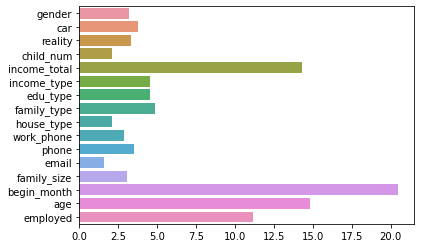

In [52]:
sns.barplot(x=clf.feature_importances_, y=clf.feature_names_, ci=None);

---

# 데이콘 제출하기

In [53]:
# 파일 불러오기
submit = pd.read_csv("data/sample_submission.csv")
submit.head(2)

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0


In [54]:
submit[["0", "1", "2"]] = cat_pred

In [55]:
submit

,index,0,1,2
0,26457,0.235980,0.189220,0.574800
1,26458,0.029485,0.086057,0.884457
2,26459,0.037441,0.177233,0.785327
3,26460,0.103581,0.142969,0.753450
4,26461,0.136911,0.252968,0.610121
...,...,...,...,...
9995,36452,0.074912,0.090003,0.835084
9996,36453,0.061090,0.385695,0.553215
9997,36454,0.070956,0.033744,0.895300
9998,36455,0.056145,0.350530,0.593326


In [56]:
# 파일 저장하기
submit.to_csv("data/submit_catboost_1.csv", index=False)

In [57]:
# 확인하기
pd.read_csv("data/submit_catboost_1.csv")

,index,0,1,2
0,26457,0.235980,0.189220,0.574800
1,26458,0.029485,0.086057,0.884457
2,26459,0.037441,0.177233,0.785327
3,26460,0.103581,0.142969,0.753450
4,26461,0.136911,0.252968,0.610121
...,...,...,...,...
9995,36452,0.074912,0.090003,0.835084
9996,36453,0.061090,0.385695,0.553215
9997,36454,0.070956,0.033744,0.895300
9998,36455,0.056145,0.350530,0.593326
